In [1]:
def lire_et_stocker_fichier(nom_fichier):
    try:
        # Initialiser des tableaux vides pour chaque colonne
        client_x = []
        client_y = []
        P = []

        # Ouvrir le fichier en mode lecture
        with open(nom_fichier, 'r') as fichier:
            # Lire chaque ligne du fichier
            for ligne in fichier:
                # Diviser la ligne en éléments en utilisant l'espace comme séparateur
                elements = ligne.strip().split()

                # Stocker chaque élément dans le tableau approprié
                client_x.append(float(elements[0]))
                client_y.append(float(elements[1]))
                P.append(float(elements[2]))

        # Retourner les tableaux
        return client_x, client_y, P

    except FileNotFoundError:
        print(f"Le fichier {nom_fichier} n'a pas été trouvé.")
        return [], [], []
    except Exception as e:
        print(f"Une erreur s'est produite : {e}")
        return [], [], []

# Exemple d'utilisation avec nos instances
nom_fichier_entree = 'tinstance.txt'

client_x, client_y, P = lire_et_stocker_fichier(nom_fichier_entree)

# Afficher les tableaux
print("Client_x :", client_x)
print("Client_y :", client_y)
print("Profit :", P)


Client_x : [35.0, 15.0, 55.0, 31.0, 60.0, 8.0, 13.0, 60.0, 21.0, 56.0, 45.0, 35.0, 15.0, 22.0, 19.0, 20.0, 37.0]
Client_y : [35.0, 30.0, 5.0, 52.0, 12.0, 56.0, 52.0, 68.0, 24.0, 39.0, 30.0, 69.0, 19.0, 22.0, 21.0, 26.0, 35.0]
Profit : [0.0, 26.0, 29.0, 27.0, 31.0, 27.0, 36.0, 30.0, 28.0, 36.0, 17.0, 23.0, 100.0, 2.0, 10.0, 9.0, 0.0]


# Variables importantes

In [2]:
N=len(P)
n=N#nombre de clients, ici le dpart et l'arrivée y sont inclus
m=2#nombre de vehicule dans la flotte
tmax=10#temps de parcours maximal pour chaque vehicule
K=range(1,n+1)#Enumeration des clients
F=range(1,m+1) #Enumeration des vehicules
Sp=20#on a defini une vitesse constante à laquelle roule tous les vehicules

In [3]:
N

17

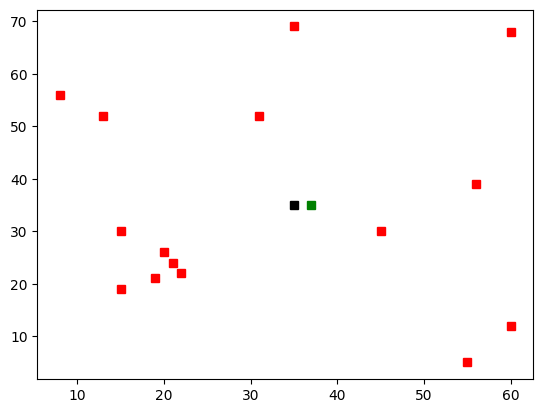

In [4]:
import numpy as np
import matplotlib.pyplot as plt
plt.plot(client_x[0],client_y[0],c='black',marker='s')
for k in range(1,n-1):
    plt.plot(client_x[k],client_y[k],c='r',marker='s')

plt.plot(client_x[n-1],client_y[n-1],c='g',marker='s')

### A ne pas oublier: le depart et l'arrivée peut être considerés comme des clients avec comme profit 0
### Un client i à pour profit P[i-1]


In [5]:
#les differents clients, depart et arrivee
V_=[i for i in range(2,n)]
V_d=[1]+V_
V_a=V_+[n]
V=[1]+V_ +[n]



In [6]:
V_
V_a
V_d
V

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17]

In [7]:
#Tous les arcs possibles 
E=[(i,j) for i in V_d for j in V if i!=j ]

In [8]:
E


[(1, 2),
 (1, 3),
 (1, 4),
 (1, 5),
 (1, 6),
 (1, 7),
 (1, 8),
 (1, 9),
 (1, 10),
 (1, 11),
 (1, 12),
 (1, 13),
 (1, 14),
 (1, 15),
 (1, 16),
 (1, 17),
 (2, 1),
 (2, 3),
 (2, 4),
 (2, 5),
 (2, 6),
 (2, 7),
 (2, 8),
 (2, 9),
 (2, 10),
 (2, 11),
 (2, 12),
 (2, 13),
 (2, 14),
 (2, 15),
 (2, 16),
 (2, 17),
 (3, 1),
 (3, 2),
 (3, 4),
 (3, 5),
 (3, 6),
 (3, 7),
 (3, 8),
 (3, 9),
 (3, 10),
 (3, 11),
 (3, 12),
 (3, 13),
 (3, 14),
 (3, 15),
 (3, 16),
 (3, 17),
 (4, 1),
 (4, 2),
 (4, 3),
 (4, 5),
 (4, 6),
 (4, 7),
 (4, 8),
 (4, 9),
 (4, 10),
 (4, 11),
 (4, 12),
 (4, 13),
 (4, 14),
 (4, 15),
 (4, 16),
 (4, 17),
 (5, 1),
 (5, 2),
 (5, 3),
 (5, 4),
 (5, 6),
 (5, 7),
 (5, 8),
 (5, 9),
 (5, 10),
 (5, 11),
 (5, 12),
 (5, 13),
 (5, 14),
 (5, 15),
 (5, 16),
 (5, 17),
 (6, 1),
 (6, 2),
 (6, 3),
 (6, 4),
 (6, 5),
 (6, 7),
 (6, 8),
 (6, 9),
 (6, 10),
 (6, 11),
 (6, 12),
 (6, 13),
 (6, 14),
 (6, 15),
 (6, 16),
 (6, 17),
 (7, 1),
 (7, 2),
 (7, 3),
 (7, 4),
 (7, 5),
 (7, 6),
 (7, 8),
 (7, 9),
 (7, 10),
 (7, 1

In [9]:
#Les distances entre les differents arcs
D={(i,j):np.hypot(client_x[i-1]-client_x[j-1],client_y[i-1]-client_y[j-1]) for i,j in E}

In [10]:
D


{(1, 2): 20.615528128088304,
 (1, 3): 36.05551275463989,
 (1, 4): 17.46424919657298,
 (1, 5): 33.97057550292606,
 (1, 6): 34.20526275297414,
 (1, 7): 27.80287754891569,
 (1, 8): 41.400483088968905,
 (1, 9): 17.804493814764857,
 (1, 10): 21.37755832643195,
 (1, 11): 11.180339887498949,
 (1, 12): 34.0,
 (1, 13): 25.612496949731394,
 (1, 14): 18.384776310850235,
 (1, 15): 21.2602916254693,
 (1, 16): 17.4928556845359,
 (1, 17): 2.0,
 (2, 1): 20.615528128088304,
 (2, 3): 47.16990566028302,
 (2, 4): 27.202941017470888,
 (2, 5): 48.46648326421054,
 (2, 6): 26.92582403567252,
 (2, 7): 22.090722034374522,
 (2, 8): 58.89821729050889,
 (2, 9): 8.48528137423857,
 (2, 10): 41.97618372363071,
 (2, 11): 30.0,
 (2, 12): 43.829214001622255,
 (2, 13): 11.0,
 (2, 14): 10.63014581273465,
 (2, 15): 9.848857801796104,
 (2, 16): 6.4031242374328485,
 (2, 17): 22.561028345356956,
 (3, 1): 36.05551275463989,
 (3, 2): 47.16990566028302,
 (3, 4): 52.773099207835045,
 (3, 5): 8.602325267042627,
 (3, 6): 69.3541635


## Debut de l'Implementation de la modelisation


### La fonction objectif  consiste à maximiser la somme des profits collectés par les vehicules après les visites des clients. 
### Les contraintes (2) assurent que chaque client est servi au plus par un véhicule s'il est visité, les contraintes (3) et (4) garantissent qu'il puisse toujours avoir un chemin pour quitter d'un client vers un autre dans chaque tournée. La limite imposée sur le temps de trajet est assurée par les contraintes (5), les sous-tours sont interdits par les contraintes (6) et les contraintes (7) montrent le domaines des variables.

In [11]:
from itertools import chain, combinations
#Determination des partitions
def powerset(iterable):
    s = list(iterable)
    return chain.from_iterable(combinations(s, r) for r in range(2, len(s) + 1))
H=powerset(V_)#Les partitions de V_

Set parameter WLSAccessID
Set parameter WLSSecret
Set parameter LicenseID to value 2450924
Academic license 2450924 - for non-commercial use only - registered to th___@yahoo.com
Gurobi Optimizer version 11.0.0 build v11.0.0rc2 (win64 - Windows 11.0 (22621.2))

CPU model: Intel(R) Pentium(R) CPU 4417U @ 2.30GHz, instruction set [SSE2]
Thread count: 2 physical cores, 4 logical processors, using up to 4 threads

Academic license 2450924 - for non-commercial use only - registered to th___@yahoo.com
Optimize a model with 65615 rows, 608 columns and 3934566 nonzeros
Model fingerprint: 0x98bd8f3e
Variable types: 0 continuous, 608 integer (608 binary)
Coefficient statistics:
  Matrix range     [1e-01, 3e+00]
  Objective range  [2e+00, 1e+02]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 1e+01]
Found heuristic solution: objective -0.0000000
Presolve removed 0 rows and 96 columns (presolve time = 5s) ...
Presolve removed 0 rows and 96 columns (presolve time = 10s) ...
Presolve rem

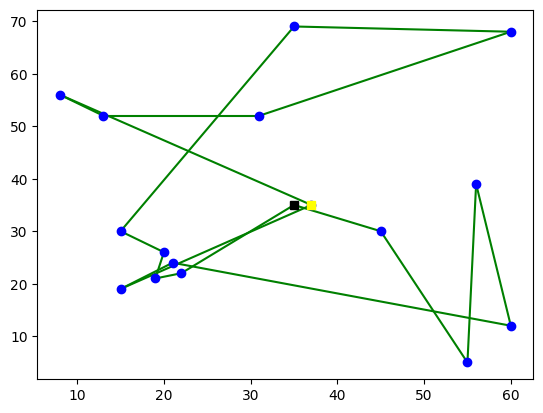

y[2,1] = 0.0
y[2,2] = 1.0
y[3,1] = 1.0
y[3,2] = 0.0
y[4,1] = 0.0
y[4,2] = 1.0
y[5,1] = 1.0
y[5,2] = 0.0
y[6,1] = 0.0
y[6,2] = 1.0
y[7,1] = 0.0
y[7,2] = 1.0
y[8,1] = 0.0
y[8,2] = 1.0
y[9,1] = 1.0
y[9,2] = 0.0
y[10,1] = 1.0
y[10,2] = 0.0
y[11,1] = 1.0
y[11,2] = 0.0
y[12,1] = 0.0
y[12,2] = 1.0
y[13,1] = 1.0
y[13,2] = 0.0
y[14,1] = 0.0
y[14,2] = 1.0
y[15,1] = 0.0
y[15,2] = 1.0
y[16,1] = 0.0
y[16,2] = 1.0
La valeur optimale de la fonction objectif est: 431.0


In [12]:
import gurobipy as gp



options = {
     "WLSACCESSID":"1d2741a4-76b6-4348-a6fb-4949fe88f4ef",
     "WLSSECRET":"d1e5222e-de13-4245-b00a-a06e9e399413",
     "LICENSEID":2450924,

}
with gp.Env(params=options) as env, gp.Model(env=env) as mdl:
        
# Définitions des variables
    #declarations des variables et leur domaines correspondant au (7) dans la formulation lineaire
    y = mdl.addVars(V_, F, vtype=gp.GRB.BINARY, name="y")  #definition de la variable y(i,r) avec i et r appartenant resp à V_ et F. y(i,r)=1 si le client i est visité par le vehicule r, O sinon
    x = mdl.addVars(V, V, F, vtype=gp.GRB.BINARY, name="x")  #definition de la variable x(i, j, r) avec i, j, et r appartenant resp à V, V et F. x(i,j,r)=1 si l('arc (i,j) est visité par le vehicule r, O sinon

# Définition de la fonction objectif
    #fonction objectif correspondant au (1) dans la formulation lineaire
    mdl.setObjective(gp.quicksum(y[i, r] * P[i-1] for i in V_ for r in F), sense=gp.GRB.MAXIMIZE)


#Definitions de toutes les contraintes
    #contrainte correspondant au (2) dans la formulation lineaire
    mdl.addConstrs((gp.quicksum(y[i, r] for r in F) <= 1 for i in V_), name="Contrainte_YiR")
    
    #contrainte correspondant au (3) dans la formulation lineaire
    for r in F:
        mdl.addConstr(gp.quicksum(x[1, j, r] for j in V_a) == 1, name=f"Contrainte_X_1_{r}")
        mdl.addConstr(gp.quicksum(x[j, n, r] for j in V_d) == 1, name=f"Contrainte_X_2_{r}")

    #contrainte correspondant au (4) dans la formulation lineaire
    for k in V_:
        for r in F:
            mdl.addConstr(gp.quicksum(x[k, i, r] for i in (set(V_a) - {k})) ==gp.quicksum(x[j, k, r] for j in (set(V_d) - {k})), f"Contrainte1_{k}_{r}")
            mdl.addConstr(gp.quicksum(x[j, k, r] for j in (set(V_d) - {k})) ==y[k, r], f"Contrainte2_{k}_{r}")
            mdl.addConstr(gp.quicksum(x[k, i, r] for i in (set(V_a) - {k})) ==y[k, r], f"Contrainte3_{k}_{r}")
            #juste 2 des 3contraintes auraient suffit(par transitivité)
        
        
    #contrainte correspondant au (5) dans la formulation lineaire
    for r in F:
        mdl.addConstr(gp.quicksum((D[(i, j)] * x[i, j, r]/Sp )for i in V_d for j in (set(V_a) - {i})) <= tmax, f"Contrainte_{r}")

    #contrainte correspondant au (5) dans la formulation lineaire
    for U in H:
        if len(U) >= 2:
            for r in F:
                mdl.addConstr(gp.quicksum(x[i, j, r] for i in U for j in U) <= len(U) - 1, f"Contrainte_{r}_U_{U}")

    #optimisation des solutions
    mdl.optimize()
    
    
    #active_arcs=[(i, j, r) for i in V for j in  V for r in F if x[i,j,r].x>0.99]
    if mdl.status == gp.GRB.OPTIMAL:
    #Accession aux valeurs des variables qui verifient les contraintes; et les arcs seront marqués
        active_arcs = [(i, j, r) for i in V_d for j in V_a for r in F if x[i, j, r].x == 1]
    else:
        print("Le modèle n'a pas été bien resolu")
        
        
    #active_arcs = [(i, j, r) for i in V_d for j in V_a for r in F if x[i, j, r].x > 0.99]
    
    for i, j, r in active_arcs:
        print(f"i={i}, j={j}, r={r}")
        plt.plot([client_x[i-1], client_x[j-1]], [client_y[i-1], client_y[j-1]], c='g', zorder=0)

    plt.plot(client_x[0], client_y[0], c='black', marker='s')
    plt.scatter(client_x[1:n], client_y[1:n], c='b')
    plt.plot(client_x[n-1], client_y[n-1], c='yellow', marker='s')
    plt.show()
    
    
    # Accéder à la solution
    if mdl.status == gp.GRB.OPTIMAL:
        for i in V_:
            for r in F:
                print(f"y[{i},{r}] = {y[i, r].X}")
    
        print(f"La valeur optimale de la fonction objectif est: {mdl.objVal}")
    else:
        print("Le modèle non pas réalisable ou une erreur est survenue")
